In [59]:
%pylab inline

import sys
import glob
import os.path as op
import shutil
from matplotlib import pyplot as plt
import scipy.misc
import skimage.transform
import skimage.io
import skimage.color
from PIL import Image
import deskew


Populating the interactive namespace from numpy and matplotlib


In [60]:
path = r"C:/Users/miros/Dokumenty/Scanned Documents/Šumavan zima 2018" 

pdf_filename = "pokus.pdf"
head, teil = op.split(path)
jpgs_path = op.join(head, teil + " - sorted")
fns = glob.glob(op.join(jpgs_path, "*"))

255
255


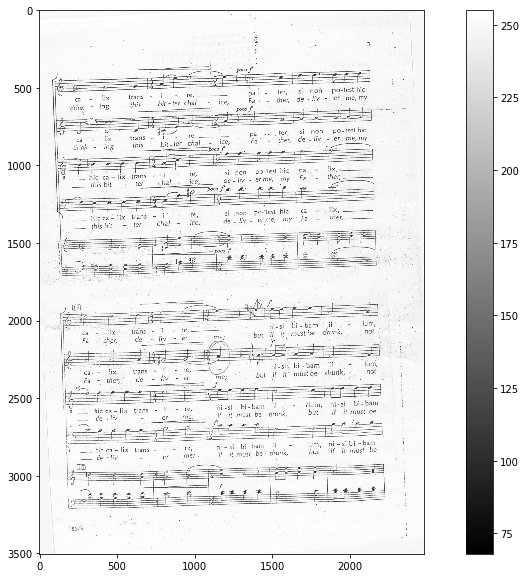

In [61]:
im = skimage.io.imread(fns[1])
imgr = skimage.color.rgb2gray(im)
imrot = (skimage.transform.rotate(imgr, 3, cval=0.98) * 255).astype(np.uint8)
imres = (skimage.transform.resize(imrot, (3504, 2480)) * 255).astype(np.uint8)
plt.figure(figsize=(15,10))
plt.imshow(imres, cmap="gray")
plt.colorbar()

print(np.max(imres))
print(np.max(imrot))

In [62]:
angle0 = deskew.deskew(imrot)
angle0

-1.4709999999999999

In [63]:
angle1 = deskew.deskew_determ(imres)
angle1

-1.4108910891089108

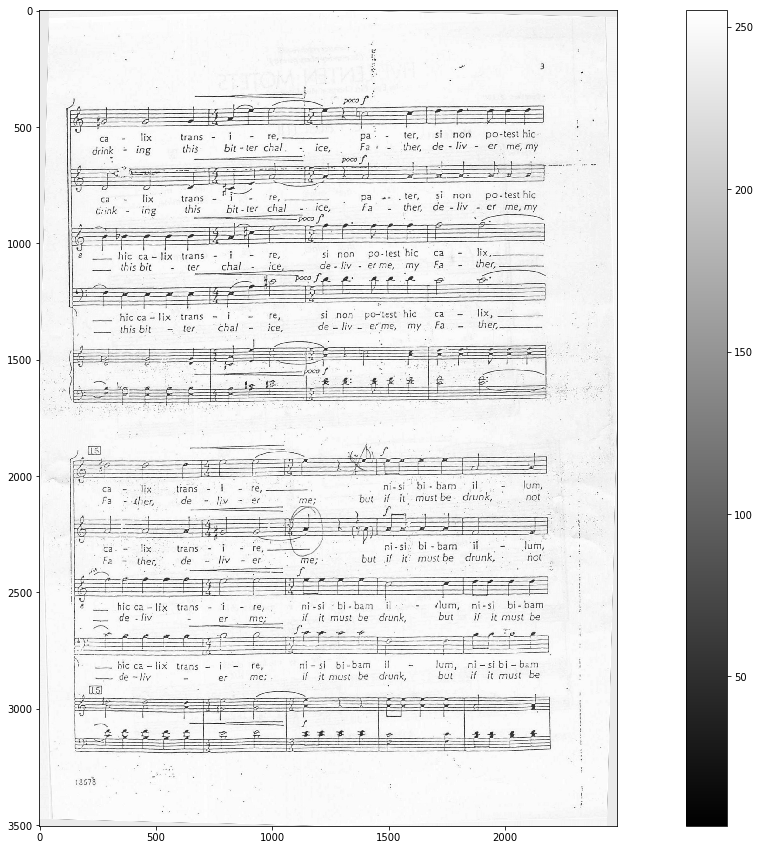

In [64]:
imrestored = deskew.rotate(imres, angle1)
plt.figure(figsize=(25,15))
plt.imshow(imrestored, cmap="gray")
plt.colorbar()